In [1]:
import os
import redshift_utils as rs
import pandas as pd
import time
import sagemaker
import boto3
from skrub import TableReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml


In [2]:
bucket = "edcs3.prod.biads"
boto_session = boto3.session.Session(region_name="eu-west-1")
sess = sagemaker.session.Session(boto_session, default_bucket=bucket)
region = sess.boto_session.region_name
account = sess.boto_session.client('sts').get_caller_identity()['Account']
role = sagemaker.get_execution_role()
ssm_client = boto3.client('ssm')
kms_key = ssm_client.get_parameter(Name='/prod/sagemaker/BIADS/sloth/KMS_KEY_ID', WithDecryption=True)["Parameter"]["Value"] 

In [3]:
def load_data(params, sql):
    sloth_credentials = rs.get_sloth_credentials()
    con = rs.connect_to_redshift(sloth_credentials)
    data = rs.execute_sql(
        RSconn=con,
        sql=sql,
        input_type="file",
        params=params
    )
    return data

In [24]:
# Create prep table
params = {'@iam': 'arn:aws:iam::765819017647:role/rs-edcs3.prod.marketing',
          '@kms': kms_key, 
         }
data = load_data(params=params, sql='../data/customer_market_group_analysis.sql')
player_props = pd.DataFrame(data)
# df['stake'] = pd.to_numeric(df['stake'])
# df['leg_price_actual'] = pd.to_numeric(df['leg_price_actual'])


In [11]:
total_vol = 9939556+13247011+5537999+4658050+10142216
total_rev = (-1348231) +(-4335909) + (-601802) +(-1089674) + (-2150119)
total_marks = 199 + 130 + 44 + 58 + 105
# total_sharp = 
print(total_marks)
print(total_rev)
print(total_vol)


536
-9525735
43524832


In [22]:
data = load_data(params=params, sql='../data/customer_market_group_analysis.sql')
corners = pd.DataFrame(data)

In [23]:
data = load_data(params=params, sql='../data/customer_market_group_analysis.sql')
cards = pd.DataFrame(data)

In [25]:
df = pd.concat([player_props, corners, cards], ignore_index=True)
df.head(60)


,ramp_selection_id,sportex_selection_name,event_name,market_name,market_group,trigger_datetime,trigger_odds,total_marked_accounts,adjusted_price,total_bets,...,post_trigger_bets,affected_bets,pct_post_trigger,pct_affected_of_post,original_volume,original_revenue,adjusted_revenue,revenue_difference,revenue_impact_pct,post_trigger_total_volume
0,2331292706,Joao Gomes,Wolves v Everton,Player To Have 1 Or More Shots On Target,Player Props,2025-03-05 14:32:01,3.3000,34,2.97000,1177,...,1138,766,96.7,67.3,11349.9228,10314.8916,10314.89160,0.00,0.00,10079.90
1,2417277206,Flamengo,SE Palmeiras v Flamengo,Team To Have 5 Or More Shots On Target,Player Props,2025-05-23 12:01:05,3.3000,27,2.97000,102,...,94,66,92.2,70.2,1129.2262,1090.5943,1090.59430,0.00,0.00,1075.11
2,2411325175,Welington,Everton v Southampton,Player To Have 1 Or More Shots On Target,Player Props,2025-05-14 23:27:06,8.5000,18,7.65000,117,...,65,58,55.6,89.2,1875.7743,1661.5374,1661.53740,0.00,0.00,1035.78
3,2314802806,Calvin Bassey,Fulham v Crystal Palace,Player To Commit 3 Or More Fouls,Player Props,2025-02-22 14:38:22,1.5795,17,1.42155,414,...,229,217,55.3,94.8,222.9304,219.7942,219.79420,0.00,0.00,148.55
4,2306177361,Caleb Watts,Exeter v Nottm Forest,Player To Have 2 Or More Shots,Player Props,2025-02-09 21:22:17,4.0000,17,3.60000,67,...,40,26,59.7,65.0,1938.3264,260.6159,260.61590,0.00,0.00,1094.93
5,2417277168,Flamengo,SE Palmeiras v Flamengo,Team To Have 12 Or More Shots,Player Props,2025-05-22 19:08:30,2.4000,16,2.16000,111,...,106,92,95.5,86.8,3055.0520,2890.1258,2890.12580,0.00,0.00,3014.53
6,2382585430,Waldemar Anton,Dortmund v Barcelona,Player To Have 1 Or More Shots On Target,Player Props,2025-04-13 16:11:43,6.0000,16,5.40000,168,...,132,119,78.6,90.2,3242.5118,2935.3445,2935.34450,0.00,0.00,2504.22
7,2292075050,Antonee Robinson,Fulham v Man Utd,Player To Have 3 Or More Shots On Target,Player Props,2025-01-23 20:35:29,6.0000,16,5.40000,529,...,479,310,90.5,64.7,5993.4042,5161.0701,5161.07010,0.00,0.00,4914.07
8,2297163701,Jake O'Brien,Everton v Leicester,Player To Commit 2 Or More Fouls,Player Props,2025-02-01 14:25:29,1.8121,15,1.63089,927,...,490,368,52.9,75.1,2438.2423,2218.4188,2218.41880,0.00,0.00,1706.23
9,2417514257,Dodo,Udinese v Fiorentina,Player To Have 2 Or More Shots,Player Props,2025-05-25 18:20:40,8.7012,15,7.83108,19,...,9,0,47.4,0.0,243.8901,-1006.0352,-1006.03520,0.00,0.00,36.50


In [26]:
# categorical_cols = ['liability_parent_group', 'market_group']
# for col in df.columns:
#     if col in categorical_cols:
#         df[col] = df[col].astype('category')
#     else:
#         df[col] = pd.to_numeric(df[col], errors='coerce')
# counts = df['liability_parent_group'].value_counts()
# print(counts)
data_table = TableReport(df)
data_table
# total_revenue_sum = df['total_revenue'].sum()
# total_legs = df['total_legs_per_market_group'].sum()
# print(total_revenue_sum)
# print(total_legs)
# df.head(60)


Processing column  21 / 21


,,,,,,,,,,,,,,,,,,,,,


In [27]:
total_revenue_sum = df['original_revenue'].sum()
total_volume_sum = df['original_volume'].sum()
print('margin:',(total_revenue_sum/total_volume_sum))
print('total rev', total_revenue_sum)
total_volume_sum = df['adjusted_revenue'].sum()
print('new rev', total_volume_sum)
total_margin_sum = total_volume_sum - total_revenue_sum
print('difference', total_margin_sum)
total_altered_bets = df['affected_bets'].sum()
print('total altered bets', total_altered_bets)
print(df.columns)

margin: 0.1103236696133076876390018243
total rev 1225512.8027
new rev 1423474.63840
difference 197961.83570
total altered bets 1594917
Index(['ramp_selection_id', 'sportex_selection_name', 'event_name',
       'market_name', 'market_group', 'trigger_datetime', 'trigger_odds',
       'total_marked_accounts', 'adjusted_price', 'total_bets',
       'pre_trigger_bets', 'post_trigger_bets', 'affected_bets',
       'pct_post_trigger', 'pct_affected_of_post', 'original_volume',
       'original_revenue', 'adjusted_revenue', 'revenue_difference',
       'revenue_impact_pct', 'post_trigger_total_volume'],
      dtype='object')


197961.83570
16.15338781152334998776590096


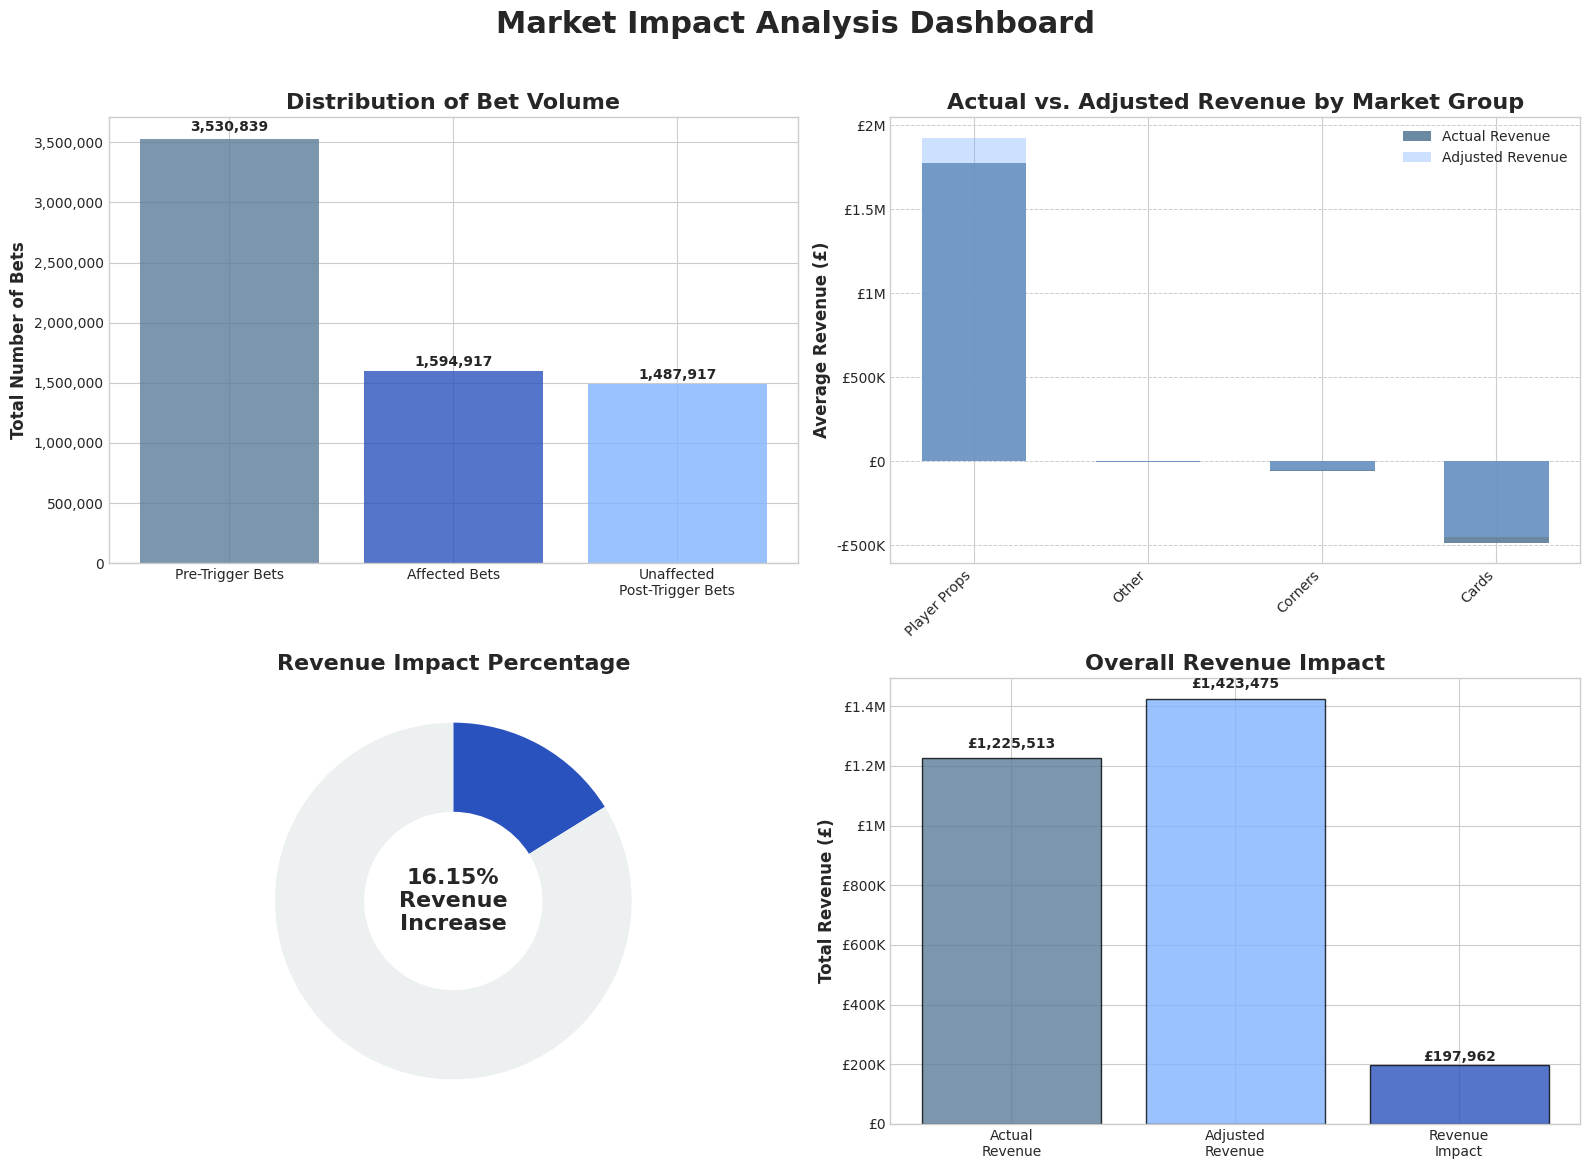

Dashboard saved as 'custom_2x2_dashboard.png'


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# --- 2. Calculate Aggregate Metrics from the DataFrame ---
# These totals will be used in the summary plots.
total_rev = df['original_revenue'].sum()
new_rev = df['adjusted_revenue'].sum()
difference = new_rev - total_rev
print(difference)
# (original_revenue - adjusted_revenue) / NULLIF(original_revenue, 0) * 100
impact_pct = (difference / total_rev) * 100
print(impact_pct)       

# Calculate bet volumes for the distribution plot.
total_pre_trigger_bets = df['pre_trigger_bets'].sum()
total_post_trigger_bets = df['post_trigger_bets'].sum()
total_affected_bets = df['affected_bets'].sum()
# The 'unaffected' portion is the part of post-trigger bets that wasn't affected.
total_unaffected_post_trigger = total_post_trigger_bets - total_affected_bets


# --- 3. Build the 2x2 Dashboard ---
plt.style.use('seaborn-v0_8-whitegrid')
# Create a figure and a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Market Impact Analysis Dashboard',
             fontsize=22, fontweight='bold', y=0.97)


# --- Plot 1 (Top Left): Distribution of Bets ---
# This bar chart shows the total volume for three key bet categories.
ax1 = axes[0, 0]
categories = ['Pre-Trigger Bets', 'Affected Bets', 'Unaffected\nPost-Trigger Bets']
values = [total_pre_trigger_bets, total_affected_bets, total_unaffected_post_trigger]
colors = ['#5B7C99', '#2A52BE', '#80B3FF']

bars = ax1.bar(categories, values, color=colors, alpha=0.8)

ax1.set_title('Distribution of Bet Volume', fontsize=16, fontweight='bold')
ax1.set_ylabel('Total Number of Bets', fontsize=12, fontweight='bold')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:,.0f}'))
# Add value labels on top of the bars.
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2.0, height + height*0.01, f'{height:,.0f}',
             ha='center', va='bottom', fontweight='bold')

revenue_by_group = df.groupby('market_group')[['original_revenue', 'adjusted_revenue']].sum().sort_values(by='adjusted_revenue', ascending=False)
sorted_groups = revenue_by_group.index.tolist()

# --- Plot 2 (Top Right): Average Revenue by Market Group ---
# This plot overlays adjusted revenue on original revenue.
ax2 = axes[0, 1]
x_indices = np.arange(len(sorted_groups))
bar_width = 0.6

# Plot 'original_revenue' first with a lower alpha to act as a background.
ax2.bar(x_indices, revenue_by_group['original_revenue'], bar_width,
        label='Actual Revenue',
        color='#5B7C99',
        alpha=0.9) # Alpha dropped for a "ghost" effect

# Plot 'adjusted_revenue' on top, more prominently.
ax2.bar(x_indices, revenue_by_group['adjusted_revenue'], bar_width,
        label='Adjusted Revenue',
        color='#80B3FF',
        alpha=0.4) # Overlayed on top

ax2.set_title('Actual vs. Adjusted Revenue by Market Group', fontsize=16, fontweight='bold')
ax2.set_ylabel('Average Revenue (£)', fontsize=12, fontweight='bold')
ax2.set_xticks(x_indices)
ax2.set_xticklabels(sorted_groups, rotation=45, ha="right")
ax2.yaxis.set_major_formatter(plt.FuncFormatter(currency_formatter_bmt))
ax2.legend()
ax2.grid(True, which='major', axis='y', linestyle='--', linewidth=0.7)


# --- Plot 3 (Bottom Left): Revenue Impact Percentage ---
# The donut chart is used as a visual "gauge" for the overall percentage impact.
ax3 = axes[1, 0]
# Ensure the percentage is within a displayable range [0, 100] for the pie chart.
display_pct = max(0, min(100, impact_pct))
sizes = [display_pct, 100 - display_pct]
colors_gauge = ['#2A52BE', '#ecf0f1']
# The 'wedgeprops' argument creates the donut hole in the center.
ax3.pie(sizes, colors=colors_gauge, startangle=90,
        counterclock=False, wedgeprops=dict(width=0.5))
# Add the text label in the center of the donut.
ax3.text(0, 0, f'{impact_pct:.2f}%\nRevenue\nIncrease',
         ha='center', va='center', fontsize=16, fontweight='bold')
ax3.set_title('Revenue Impact Percentage', fontsize=16, fontweight='bold')


# --- Plot 4 (Bottom Right): Overall Revenue Impact ---
# This bar chart provides a clear, high-level summary of the absolute revenue figures.
ax4 = axes[1, 1]
categories = ['Actual\nRevenue', 'Adjusted\nRevenue', 'Revenue\nImpact']
values = [total_rev, new_rev, difference]
colors = ['#5B7C99', '#80B3FF', '#2A52BE']
bars = ax4.bar(categories, values, color=colors, alpha=0.8, edgecolor='black', linewidth=1)
ax4.set_ylabel('Total Revenue (£)', fontsize=12, fontweight='bold')
ax4.set_title('Overall Revenue Impact', fontsize=16, fontweight='bold')
ax4.yaxis.set_major_formatter(plt.FuncFormatter(currency_formatter_bmt))
# Add value labels on top of the bars.
for bar in bars:
    height = bar.get_height()
    # Adjust text position slightly for better visibility.
    text_y = height + abs(height) * 0.02
    ax4.text(bar.get_x() + bar.get_width()/2.0, text_y, f'£{height:,.0f}',
             ha='center', va='bottom', fontweight='bold')


# --- 4. Final Touches ---
# Adjust layout to prevent titles and labels from overlapping.
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('custom_2x2_dashboard.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("Dashboard saved as 'custom_2x2_dashboard.png'")

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data from the market analysis
data = {
    'market_group': ['Match Odds', 'Corners', 'Other Goal Markets', 'Cards', 'Player Props'],
    'total_volume': [9939555.7578, 13247011.3993, 5537998.5207, 4658050.0041, 10142215.5104],
    'total_revenue': [-1348231.0851, -4335909.3337, -601802.3569, -1089674.1745, -2150119.2411],
    'total_marks': [199, 130, 44, 58, 105]
}

df = pd.DataFrame(data)

# Calculate revenue margin for color coding
df['revenue_margin'] = (df['total_revenue'] / df['total_volume']) * 100

# Set up the plot with sophisticated styling
plt.figure(figsize=(14, 10))
plt.style.use('seaborn-v0_8-whitegrid')

# Colors from your specification
colors = ['#5B7C99', '#80B3FF', '#2A52BE', '#4A6FA5', '#6699CC']

# Create bubble chart: Volume vs Revenue with Market Marks as bubble size
scatter = plt.scatter(df['total_volume'], df['total_revenue'], 
                     s=df['total_marks'] * 15,  # Scale bubble size
                     c=colors[:len(df)], 
                     alpha=0.7,
                     edgecolors='white',
                     linewidth=2)

# Add market labels with smart positioning
for i, row in df.iterrows():
    # Position labels to avoid overlap
    offset_x = 200000 if i % 2 == 0 else -200000
    offset_y = 100000 if i < 3 else -100000
    
    plt.annotate(f"{row['market_group']}\n({row['total_marks']} marks)", 
                (row['total_volume'], row['total_revenue']),
                xytext=(offset_x, offset_y), 
                textcoords='offset points',
                fontsize=11, 
                fontweight='bold',
                ha='center',
                va='center',
                bbox=dict(boxstyle='round,pad=0.3', 
                         facecolor='white', 
                         alpha=0.8, 
                         edgecolor='gray'),
                arrowprops=dict(arrowstyle='->', 
                               connectionstyle='arc3,rad=0.1',
                               color='gray',
                               alpha=0.6))

# Formatting and labels
plt.xlabel('Total Volume ($)', fontsize=14, fontweight='bold')
plt.ylabel('Total Revenue ($)', fontsize=14, fontweight='bold')
plt.title('Sports Betting Market Analysis\nVolume vs Revenue (Bubble Size = Market Activity)', 
          fontsize=16, fontweight='bold', pad=20)

# Format axes to millions
plt.ticklabel_format(style='scientific', axis='both', scilimits=(0,0))

# Add reference lines
plt.axhline(y=0, color='red', linestyle='--', alpha=0.5, linewidth=2, label='Break-even')
plt.axvline(x=df['total_volume'].mean(), color='gray', linestyle=':', alpha=0.5, label='Avg Volume')

# Add insights text box
insights_text = f"""KEY INSIGHTS:
• All markets show negative revenue (house losses)
• Corners: Highest volume (${df['total_volume'].max()/1e6:.1f}M)
• Best opportunity: {df.loc[df['revenue_margin'].idxmax(), 'market_group']} 
  ({df['revenue_margin'].max():.2f}% margin)
• Total market: ${df['total_volume'].sum()/1e6:.1f}M volume
• House losses: ${abs(df['total_revenue'].sum())/1e6:.1f}M"""

plt.text(0.02, 0.98, insights_text, 
         transform=plt.gca().transAxes, 
         fontsize=10, 
         verticalalignment='top',
         bbox=dict(boxstyle='round,pad=0.5', 
                  facecolor='lightblue', 
                  alpha=0.8))

# Add legend for bubble sizes
bubble_sizes = [50, 100, 150]
bubble_labels = ['50 marks', '100 marks', '150 marks']
legend_elements = [plt.scatter([], [], s=size*15, c='gray', alpha=0.6, edgecolors='white', linewidth=2) 
                  for size in bubble_sizes]

legend1 = plt.legend(legend_elements, bubble_labels, 
                    scatterpoints=1, loc='lower right', 
                    title='Market Activity', title_fontsize=12)
plt.gca().add_artist(legend1)

# Grid and final styling
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Add subtle background color
plt.gca().set_facecolor('#fafafa')

plt.show()

# Print the key insight
best_market = df.loc[df['revenue_margin'].idxmax(), 'market_group']
print(f"🎯 BEST OPPORTUNITY: {best_market} market with {df['revenue_margin'].max():.2f}% margin")
print(f"💰 TOTAL HOUSE LOSSES: ${abs(df['total_revenue'].sum()):,.0f} across all markets")

/tmp/ipykernel_412/515158798.py:99: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


: 

: 

In [29]:
def currency_formatter_bmt(y_value, position): # bmt for Billions, Millions, Thousands
    """Formats y-axis ticks to £XB, £XM, £XK, or £X"""
    if y_value == 0:
        return '£0'
    abs_y_value = abs(y_value)
    sign = '£' if y_value >= 0 else '-£'

    if abs_y_value >= 1_000_000_000:
        val_billions = abs_y_value / 1_000_000_000
        return f'{sign}{val_billions:.1f}B'.replace('.0B', 'B')
    elif abs_y_value >= 1_000_000:
        val_millions = abs_y_value / 1_000_000
        return f'{sign}{val_millions:.1f}M'.replace('.0M', 'M')
    elif abs_y_value >= 1_000:
        val_thousands = abs_y_value / 1_000
        return f'{sign}{val_thousands:.0f}K'
    else:
        return f'{sign}{abs_y_value:.0f}'

## Line Graph of Top Sports by Volume

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.ticker as mticker

color_config = {
    'PP': {'main': '#004833', 'top': '#30953e'},
    'BF': {'main': '#ff7f0e', 'top': '#ffbb78'},
    'SBG': {'main': '#692773', 'top': '#33347c'} 
}

# 1. Data Preparation
# Determine order of sports on x-axis: descending by effective_total_revenue
sport_overall_revenue = df.groupby('sport_name')['total_revenue'].sum().sort_values(ascending=False)
sorted_sports = sport_overall_revenue.index.tolist()
brands_to_plot = [b for b in color_config.keys() if b in df['brand'].unique()]

# --- 4. Plotting Setup ---
num_sports = len(sorted_sports)
num_brands = len(brands_to_plot)

x_indices = np.arange(num_sports)  # the label locations for sports
total_cluster_width = 0.8          # Total width for all bars in a cluster
bar_width = total_cluster_width / num_brands if num_brands > 0 else total_cluster_width

fig, ax = plt.subplots(figsize=(max(12, num_sports * num_brands * 0.6), 8)) # Dynamic width

# --- 5. Create Bars for Each Brand ---
for i, brand_name in enumerate(brands_to_plot):
    # Calculate the offset for this brand's bars
    offset = (i - (num_brands - 1) / 2) * bar_width
    
    # Get data for the current brand, ordered by sorted_sports, fill missing sports with 0
    brand_data = df[df['brand'] == brand_name].set_index('sport_name').reindex(sorted_sports).fillna(0)
    
    base_values = brand_data['total_volume'] - brand_data['total_revenue']   
    margin_values = brand_data['total_revenue'] 

    # Plot the base part (e.g., volume/cost)
    ax.bar(x_indices + offset, base_values, bar_width,
            label=brand_name, 
            color=color_config[brand_name]['main'])

    # Plot the margin part on top
    ax.bar(x_indices + offset, margin_values, bar_width,
            bottom=base_values,
            color=color_config[brand_name]['top'])

# --- 6. Add Labels, Title, and Ticks ---
plot_title="Revenue and Margin by Sport and Brand"
ax.set_ylabel('Total Revenue (Volume + Margin)', fontsize=14)
ax.set_title(plot_title, fontsize=16, pad=20)
ax.set_xticks(x_indices)
ax.set_xticklabels(sorted_sports, rotation=45, ha="right")

# Apply currency formatter to y-axis
ax.yaxis.set_major_formatter(mticker.FuncFormatter(currency_formatter_bmt))

# --- 7. Add Legend ---
ax.legend(title='Brands',
              bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=0.)

# --- 8. Styling and Layout ---
plt.grid(True, which='major', axis='y', linestyle=':', linewidth=0.7, alpha=0.6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust rect to make space for legend
plt.show()


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:16                                                                                   │
│                                                                                                  │
│   13                                                                                             │
│   14 # 1. Data Preparation                                                                       │
│   15 # Determine order of sports on x-axis: descending by effective_total_revenue                │
│ ❱ 16 sport_overall_revenue = df.groupby('sport_name')['total_revenue'].sum().sort_values(asce    │
│   17 sorted_sports = sport_overall_revenue.index.tolist()                                        │
│   18 brands_to_plot = [b for b in color_config.keys() if b in df['brand'].unique()]              │
│   19                                                                                             │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/cenv/lib/python3.10/site-packages/pandas/core/frame.py:9183 in  │
│ groupby                                                                                          │
│                                                                                                  │
│    9180 │   │   if level is None and by is None:                                                 │
│    9181 │   │   │   raise TypeError("You have to supply one of 'by' and 'level'")                │
│    9182 │   │                                                                                    │
│ ❱  9183 │   │   return DataFrameGroupBy(                                                         │
│    9184 │   │   │   obj=self,                                                                    │
│    9185 │   │   │   keys=by,                                                                     │
│    9186 │   │   │   axis=axis,                                                                   │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/cenv/lib/python3.10/site-packages/pandas/core/groupby/groupby.p │
│ y:1329 in __init__                                                                               │
│                                                                                                  │
│   1326 │   │   self.dropna = dropna                                                              │
│   1327 │   │                                                                                     │
│   1328 │   │   if grouper is None:                                                               │
│ ❱ 1329 │   │   │   grouper, exclusions, obj = get_grouper(                                       │
│   1330 │   │   │   │   obj,                                                                      │
│   1331 │   │   │   │   keys,                                                                     │
│   1332 │   │   │   │   axis=axis,                                                                │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/cenv/lib/python3.10/site-packages/pandas/core/groupby/grouper.p │
│ y:1043 in get_grouper                                                                            │
│                                                                                                  │
│   1040 │   │   │   elif obj._is_level_reference(gpr, axis=axis):                                 │
│   1041 │   │   │   │   in_axis, level, gpr = False, gpr, None                                    │
│   1042 │   │   │   else:                                                                         │
│ ❱ 1043 │   │   │   │   raise KeyError(gpr)                 

## Deciles cuts of stakes to understand distribution for downstream analysis (bucketing)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace with your actual DataFrame and column
col = 'stake'
df_clean = df[col].dropna()

# Step 1: Calculate deciles from full data (with outliers)
decile_thresholds = df_clean.quantile([i / 10 for i in range(1, 10)])

# Step 2: Remove outliers for visualization (e.g., 1st–99th percentile)
upper_bound = df_clean.quantile(0.95)
df_filtered = df_clean[(df_clean <= upper_bound)]

# Step 3: Plot distribution (filtered data), with decile lines (from full data)
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered, bins=30, kde=False, color='skyblue')
plt.title(f'Distribution of {col} with Decile Thresholds')
plt.xlabel(col)
plt.ylabel('Frequency')

# Draw decile lines from full data
for q, val in decile_thresholds.items():
    plt.axvline(x=val, color='red', linestyle='dotted', linewidth=1)
    plt.text(val, plt.ylim()[1]*0.95, f'{int(q*100)}%', rotation=90, color='red', ha='center')

plt.tight_layout()
plt.show()

# Print decile thresholds
print("Decile thresholds (based on full data):")
print(decile_thresholds)


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /home/sagemaker-user/.conda/envs/cenv/lib/python3.10/site-packages/pandas/core/indexes/base.py:3 │
│ 805 in get_loc                                                                                   │
│                                                                                                  │
│   3802 │   │   """                                                                               │
│   3803 │   │   casted_key = self._maybe_cast_indexer(key)                                        │
│   3804 │   │   try:                                                                              │
│ ❱ 3805 │   │   │   return self._engine.get_loc(casted_key)                                       │
│   3806 │   │   except KeyError as err:                                                           │
│   3807 │   │   │   if isinstance(casted_key, slice) or (                                         │
│   3808 │   │   │   │   isinstance(casted_key, abc.Iterable)                                      │
│                                                                                                  │
│ in pandas._libs.index.IndexEngine.get_loc:167                                                    │
│                                                                                                  │
│ in pandas._libs.index.IndexEngine.get_loc:196                                                    │
│                                                                                                  │
│ in pandas._libs.hashtable.PyObjectHashTable.get_item:7081                                        │
│                                                                                                  │
│ in pandas._libs.hashtable.PyObjectHashTable.get_item:7089                                        │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'stake'

The above exception was the direct cause of the following exception:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:7                                                                                    │
│                                                                                                  │
│    4                                                                                             │
│    5 # Replace with your actual DataFrame and column                                             │
│    6 col = 'stake'                                                                               │
│ ❱  7 df_clean = df[col].dropna()                                                                 │
│    8                                                                                             │
│    9 # Step 1: Calculate deciles from full data (with outliers)                                  │
│   10 decile_thresholds = df_clean.quantile([i / 10 for i in range(1, 10)])                       │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/cenv/lib/python3.10/site-packages/pandas/core/frame.py:4102 in  │
│ __getitem__                                                                                      │
│                                                                                                  │
│    4099 │   │   if is_single_key:                                                                │
│    4100 │   │   │   if self.columns.nlevels > 1:                                                 │
│    4101 │   │   │   │   return self._getitem_multilevel(key)                                     │
│ ❱  4102 │   │   │   indexer = self.columns.get_loc(key)                                          │
│    4103 │   │   │   if is_integer(indexer):                            

## Margin for Top 10 Sports

In [ ]:
color_config = {
    'PP': {'main': '#0a7a19', 'top': '#30953e'}, 
    'SBG': {'main': '#ff7f0e', 'top': '#ffbb78'}, 
    'BF': {'main': '#692773', 'top': '#33347c'}  # Green tones
}

plot_title="Revenue and Margin by Sport and Brand"
# Determine order of sports on x-axis: descending by total_revenue across all brands
sport_total_revenue = df.groupby(sport_col)['total_revenue'].sum().sort_values(ascending=False)
sorted_sports = sport_total_revenue.index.tolist()

# Plotting Setup
brands = sorted(df['brand'].unique())
num_sports = len(sorted_sports)
num_brands = len(brands)

x_indices = np.arange(num_sports)  # the label locations for sports
total_cluster_width = 0.8          # Total width for all bars in a cluster
bar_width = total_cluster_width / num_brands

fig, ax = plt.subplots(figsize=(max(12, num_sports * 1.5), 8)) # Dynamic width

# Create bars for each brand
for i, brand_name in enumerate(brands):
    # Each bar is placed at x_indices + offset
    offset = (i - (num_brands - 1) / 2) * bar_width
    
    # Get data for the current brand, ordered by sorted_sports
    brand_data = df[df['brand'] == brand_name].set_index('sport_name').reindex(sorted_sports).fillna(0)
    
    revenues_for_brand = brand_data['total_revenue']
    costs_for_brand = brand_data['total_volume']
    margins_for_brand = brand_data['total_margin']

    # Plot vol
    ax.bar(x_indices + offset, costs_for_brand, bar_width,
            label=brand_name, # Label for the legend
            color=color_config.get(brand_name, {}).get('main', '#808080')) # Default grey if no color

    # Plot margin
    ax.bar(x_indices + offset, margins_for_brand, bar_width,
            bottom=costs_for_brand,
            color=color_config.get(brand_name, {}).get('top', '#A9A9A9')) # Default dark grey

#  Add Labels
ax.set_ylabel(f'Total Revenue', fontsize=14)
ax.set_xlabel(f'Sport', fontsize=14)
ax.set_title(title, fontsize=16, pad=20)
ax.set_xticks(x_indices)
ax.set_xticklabels(sorted_sports, rotation=45, ha="right")

# Apply currency formatter to y-axis
ax.yaxis.set_major_formatter(mticker.FuncFormatter(currency_formatter_bmt))

# --- 6. Add Legend ---
# The legend will be created from the 'label' argument in the first ax.bar call for each brand
ax.legend(title=df['brand'],
            bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=0.)

# --- 7. Styling and Layout ---
plt.grid(True, which='major', axis='y', linestyle=':', linewidth=0.7, alpha=0.6)
# sns.despine(ax=ax, trim=True) # If using seaborn styling elements
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust for legend
plt.show()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:9                                                                                    │
│                                                                                                  │
│    6                                                                                             │
│    7 plot_title="Revenue and Margin by Sport and Brand"                                          │
│    8 # Determine order of sports on x-axis: descending by total_revenue across all brands        │
│ ❱  9 sport_total_revenue = df.groupby(sport_col)['total_revenue'].sum().sort_values(ascending    │
│   10 sorted_sports = sport_total_revenue.index.tolist()                                          │
│   11                                                                                             │
│   12 # Plotting Setup                                                                            │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
NameError: name 'sport_col' is not defined

## Breakdown by Market Group

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import matplotlib.colors as mcolors 
import matplotlib.ticker as mticker
import squarify 

title = "Tree-map of market_group density" # Your title

# Make a copy to avoid SettingWithCopyWarning if df is a slice
df_plot = df.sort_values(by='total_volume', ascending=False).copy()

# Ensure numeric types for critical columns and handle potential errors
try:
    df_plot['margin_pct'] = pd.to_numeric(df_plot['margin_pct'], errors='raise').astype(float)
    df_plot['total_volume'] = pd.to_numeric(df_plot['total_volume'], errors='raise').astype(float)
    # Ensure 'market_group' column exists (or change to your actual category column name)
    if 'market_group' not in df_plot.columns:
        raise KeyError("Column 'market_group' not found. Please check your DataFrame.")
except Exception as e:
    print(f"Error processing DataFrame columns: {e}. Please check input data structure and column names.")
    # Consider exiting or raising the error if critical
    # For now, this will stop execution if there's an issue here.
    raise

# Filter out rows where total_volume might be zero or negative, as squarify needs positive sizes
df_plot = df_plot[df_plot['total_volume'] > 0]

if df_plot.empty:
    print("No data with positive total_volume to plot after filtering. Treemap will be empty.")
else:
    # --- 6. Color Gradient for Margin (Positive Green, Negative Red) ---
    min_m = df_plot['margin_pct'].min()
    max_m = df_plot['margin_pct'].max()
    norm = None
    colors = None
    cmap = plt.cm.get_cmap('RdYlGn') # Red (Negative/Low) - Yellow (Zero/Mid) - Green (Positive/High)
    sm = None # Initialize ScalarMappable

    if df_plot['margin_pct'].isnull().all(): # Check if all margin data is NaN
        print("Margin data ('margin_pct') is entirely NaN. Using default grey color for treemap boxes.")
        colors = [plt.cm.get_cmap('Greys')(0.5)] * len(df_plot) # Mid-grey for all
        # Setup a dummy norm and sm for colorbar to indicate missing data or single color
        norm = mcolors.Normalize(vmin=0, vmax=1) # Dummy norm
        # Create a grey cmap for the colorbar if all data is NaN
        grey_cmap = mcolors.ListedColormap([plt.cm.get_cmap('Greys')(0.5)])
        sm = plt.cm.ScalarMappable(cmap=grey_cmap, norm=norm)
    else:
        # For RdYlGn, make the scale symmetric around 0 if data spans positive and negative.
        # This ensures 0% margin is yellow, positive is green, negative is red.
        extreme_abs_margin = max(abs(min_m if pd.notna(min_m) else 0), 
                                 abs(max_m if pd.notna(max_m) else 0), 
                                 0.001) # Ensure not zero for vmin=vmax if all margins are 0
        
        norm = mcolors.TwoSlopeNorm(vmin=-extreme_abs_margin, 
                                    vcenter=0.2, 
                                    vmax=extreme_abs_margin)
        colors = [cmap(norm(value)) if pd.notna(value) else plt.cm.get_cmap('Greys')(0.5) 
                  for value in df_plot['margin_pct']]
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)


    # --- 1. Conditional Text, 2. Label Content, 5. Volume Abbreviation ---
    labels = []
    for _, row in df_plot.iterrows():
        if row['total_volume'] >= 5000000:
            formatted_volume = currency_formatter_bmt(row['total_volume'], None) # pos is not used
            # Using 'market_group' as per your snippet
            label_text = f"{row['market_group']}\n{formatted_volume}\n{row['margin_pct']:.1%}"
            labels.append(label_text)
        else:
            labels.append("") # Empty string for small boxes

    # --- Plotting ---
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(1, figsize=(16, 10))

    squarify.plot(
        sizes=df_plot['total_volume'],
        label=labels,
        color=colors,
        alpha=0.9,
        ax=ax,
        # --- 3. Bold Text ---
        text_kwargs={'fontsize': 9, 'fontweight': 'bold', 'wrap': True, 'color': 'black'}, # Reduced fontsize
        # --- 4. Black Borders ---
        bar_kwargs={'edgecolor':'#000000', 'linewidth':1.5}, # Black borders
    )

    # --- Customization ---
    plt.axis('off')

    # --- Add a Colorbar ---
    if sm is not None:
        sm.set_array([]) # Necessary for ScalarMappable
        cbar_ax = fig.add_axes([0.15, 0.08, 0.7, 0.03]) # Horizontal colorbar
        colorbar = plt.colorbar(sm, cax=cbar_ax, orientation='horizontal', pad=0.01)
        
        # Format colorbar ticks as percentages.
        # For TwoSlopeNorm, ticks are relative to its vmin, vcenter, vmax.
        # We want the labels to be human-readable percentages.
        tick_values = np.linspace(norm.vmin, norm.vmax, 5) # Example: 5 ticks
        colorbar.set_ticks(tick_values)
        colorbar.ax.set_xticklabels([f"{val:.0%}" for val in tick_values])

    fig.text(0.5, 0.04, "Size of each box represents its Total Volume",
             ha='center', fontsize=10, color='gray')

    plt.show()

    # Given your aligned with DS, does that mean theres a more machine learning based approach. 

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:12                                                                                   │
│                                                                                                  │
│     9 title = "Tree-map of market_group density" # Your title                                    │
│    10                                                                                            │
│    11 # Make a copy to avoid SettingWithCopyWarning if df is a slice                             │
│ ❱  12 df_plot = df.sort_values(by='total_volume', ascending=False).copy()                        │
│    13                                                                                            │
│    14 # Ensure numeric types for critical columns and handle potential errors                    │
│    15 try:                                                                                       │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/cenv/lib/python3.10/site-packages/pandas/core/frame.py:7189 in  │
│ sort_values                                                                                      │
│                                                                                                  │
│    7186 │   │   elif len(by):                                                                    │
│    7187 │   │   │   # len(by) == 1                                                               │
│    7188 │   │   │                                                                                │
│ ❱  7189 │   │   │   k = self._get_label_or_level_values(by[0], axis=axis)                        │
│    7190 │   │   │                                                                                │
│    7191 │   │   │   # need to rewrap column in Series to apply key function                      │
│    7192 │   │   │   if key is not None:                                                          │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/cenv/lib/python3.10/site-packages/pandas/core/generic.py:1911   │
│ in _get_label_or_level_values                                                                    │
│                                                                                                  │
│    1908 │   │   elif self._is_level_reference(key, axis=axis):                                   │
│    1909 │   │   │   values = self.axes[axis].get_level_values(key)._values                       │
│    1910 │   │   else:                                                                            │
│ ❱  1911 │   │   │   raise KeyError(key)                                                          │
│    1912 │   │                                                                                    │
│    1913 │   │   # Check for duplicates                                                           │
│    1914 │   │   if values.ndim > 1:                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'total_volume'

## Bubble plot of In-play Vs Pre-Match 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from adjustText import adjust_text # Import the library

def plot_dumbbell_market_performance(
        df_input,
        market_group_col='market_group',
        time_period_flag_col='is_inplay_yn',
        value_col_x_axis='total_volume',
        value_col_dot_size='margin_pct', # Original margin for text & basis for size
        inplay_val='Y',
        prematch_val='N',
        plot_title='Market Group Volume: inplay vs prematch (Size by Margin %)',
        color_inplay='#1f77b4',
        color_prematch='#ff7f0e'
    ):
    if not isinstance(df_input, pd.DataFrame):
        raise TypeError("Input 'df_input' must be a pandas DataFrame.")
    
    required_cols = [market_group_col, time_period_flag_col, value_col_x_axis, value_col_dot_size]
    if not all(col in df_input.columns for col in required_cols):
        missing = [col for col in required_cols if col not in df_input.columns]
        raise ValueError(f"Input DataFrame is missing required columns: {', '.join(missing)}")

    df_processed = df_input.copy()
    for col in [value_col_x_axis, value_col_dot_size]:
        try:
            df_processed[col] = pd.to_numeric(df_processed[col], errors='raise').astype(float)
        except Exception as e:
            print(f"Error converting column '{col}' to numeric: {e}.")
            raise

    # --- 1. Data Preparation: Pivot data ---
    df_inplay = df_processed[df_processed[time_period_flag_col] == inplay_val][[market_group_col, value_col_x_axis, value_col_dot_size]]
    df_inplay = df_inplay.rename(columns={value_col_x_axis: 'x_inplay', value_col_dot_size: 'metric_for_size_inplay'})
    df_inplay = df_inplay.drop_duplicates(subset=[market_group_col]).set_index(market_group_col)

    df_prematch = df_processed[df_processed[time_period_flag_col] == prematch_val][[market_group_col, value_col_x_axis, value_col_dot_size]]
    df_prematch = df_prematch.rename(columns={value_col_x_axis: 'x_prematch', value_col_dot_size: 'metric_for_size_prematch'})
    df_prematch = df_prematch.drop_duplicates(subset=[market_group_col]).set_index(market_group_col)
    
    all_market_groups = df_processed[market_group_col].unique()
    df_plot = pd.DataFrame(index=all_market_groups)
    df_plot = df_plot.join(df_inplay).join(df_prematch)
    df_plot.dropna(subset=['x_inplay', 'x_prematch'], how='all', inplace=True)
    
    df_plot['label_val_inplay'] = df_plot['metric_for_size_inplay']
    df_plot['label_val_prematch'] = df_plot['metric_for_size_prematch']
    df_plot['metric_for_size_inplay'].fillna(0, inplace=True)
    df_plot['metric_for_size_prematch'].fillna(0, inplace=True)

    if df_plot.empty:
        print("No data to create dumbbell plot.")
        return

    df_plot['avg_x_val'] = df_plot[['x_inplay', 'x_prematch']].mean(axis=1)
    df_plot.sort_values(by='avg_x_val', ascending=True, inplace=True)

    # --- Dot Size Scaling ---
    temp_min_s_val_wday = df_plot['metric_for_size_inplay'].abs().min()
    temp_min_s_val_wend = df_plot['metric_for_size_prematch'].abs().min()
    min_s_val = min(temp_min_s_val_wday if pd.notna(temp_min_s_val_wday) else 0, 
                    temp_min_s_val_wend if pd.notna(temp_min_s_val_wend) else 0)

    temp_max_s_val_wday = df_plot['metric_for_size_inplay'].abs().max()
    temp_max_s_val_wend = df_plot['metric_for_size_prematch'].abs().max()
    max_s_val = max(temp_max_s_val_wday if pd.notna(temp_max_s_val_wday) else 0, 
                    temp_max_s_val_wend if pd.notna(temp_max_s_val_wend) else 0,
                    min_s_val + 0.001) # Ensure max > min if all values are same

    def scale_dot_size(series_abs_values, data_min_abs, data_max_abs, visual_min=50, visual_max=800):
        if data_min_abs == data_max_abs or pd.isna(data_min_abs) or pd.isna(data_max_abs) or (data_max_abs - data_min_abs) == 0:
            return pd.Series([visual_min + (visual_max - visual_min) / 2] * len(series_abs_values), index=series_abs_values.index)
        scaled = visual_min + ((series_abs_values.clip(lower=data_min_abs) - data_min_abs) / (data_max_abs - data_min_abs)) * (visual_max - visual_min)
        return scaled.fillna(visual_min)

    df_plot['scaled_size_inplay'] = scale_dot_size(df_plot['metric_for_size_inplay'].abs(), min_s_val, max_s_val)
    df_plot['scaled_size_prematch'] = scale_dot_size(df_plot['metric_for_size_prematch'].abs(), min_s_val, max_s_val)
    
    # --- 2. Plotting ---
    plt.style.use('seaborn-v0_8-whitegrid')
    fig, ax = plt.subplots(figsize=(12, max(6, len(df_plot) * 0.6)))
    y_positions = np.arange(len(df_plot))
    
    texts_to_adjust = []      # List to store text objects for adjustText
    x_points_for_texts = []   # X-coordinates of the points these texts are associated with
    y_points_for_texts = []   # Y-coordinates of the points

    for i, (market_group, row) in enumerate(df_plot.iterrows()):
        y_pos = y_positions[i]
        vol_inplay = row['x_inplay']
        vol_prematch = row['x_prematch']
        
        original_margin_inplay = row['label_val_inplay']
        original_margin_prematch = row['label_val_prematch']

        s_inplay = row['scaled_size_inplay']
        s_prematch = row['scaled_size_prematch']

        if pd.notna(vol_inplay) and pd.notna(vol_prematch):
            ax.plot([vol_inplay, vol_prematch], [y_pos, y_pos], 
                    color='grey', alpha=0.5, linewidth=1.5, zorder=1)

        if pd.notna(vol_inplay):
            ax.scatter(vol_inplay, y_pos, s=max(10, s_inplay), color=color_inplay, alpha=0.8, zorder=2, 
                       label='inplay' if i == 0 else "")
            if pd.notna(original_margin_inplay):
                # Initial position for text: at the dot's center. adjustText will move it.
                texts_to_adjust.append(ax.text(vol_inplay, y_pos + 0.1, f"{original_margin_inplay:.0%}",
                                                fontsize=7, color='black', ha='center', va='bottom', zorder=3))
                x_points_for_texts.append(vol_inplay)
                y_points_for_texts.append(y_pos)


        if pd.notna(vol_prematch):
            ax.scatter(vol_prematch, y_pos, s=max(10, s_prematch), color=color_prematch, alpha=0.8, zorder=2, 
                       label='prematch' if i == 0 else "")
            if pd.notna(original_margin_prematch):
                texts_to_adjust.append(ax.text(vol_prematch, y_pos + 0.1, f"{original_margin_prematch:.0%}",
                                                fontsize=7, color='black', ha='center', va='bottom', zorder=3))
                x_points_for_texts.append(vol_prematch)
                y_points_for_texts.append(y_pos)
            
    # --- Call adjustText AFTER all text objects and points are plotted ---
    if texts_to_adjust:
        adjust_text(texts_to_adjust,
                    x=x_points_for_texts, # Pass the x-coordinates of the points text should avoid
                    y=y_points_for_texts, # Pass the y-coordinates of the points
                    add_objects=ax.collections, # Consider other plotted objects like scatter points
                    expand_points=(2.5, 2.5),   # Increase keep-out area around points (bubbles)
                    expand_text=(2.5, 2.5),     # Increase keep-out area around text labels
                    force_points=1.5,           # Repulsion strength from points (higher = further)
                    force_text=1.5,             # Repulsion strength between texts
                    ax=ax,
                    lim=500) # Number of iterations for algorithm

    # --- 3. Styling & Labels ---
    ax.set_yticks(y_positions)
    ax.set_yticklabels(df_plot.index)
    ax.set_xlabel(value_col_x_axis.replace("_", " ").title(), fontsize=14)
    ax.set_ylabel(market_group_col.replace("_", " ").title(), fontsize=14)
    ax.set_title(plot_title, fontsize=16, pad=20, fontweight='bold')
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(currency_formatter_bmt))

    # --- Legend ---
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='In-Play Volume', markerfacecolor=color_inplay, markersize=10, alpha=0.8),
        Line2D([0], [0], marker='o', color='w', label='Pre-Match Volume', markerfacecolor=color_prematch, markersize=10, alpha=0.8)
    ]
    ax.legend(handles=legend_elements, loc='center right', title="Period Type", fontsize=9, title_fontsize=10) # Adjusted loc example
    
    size_metric_name = value_col_dot_size.replace('_',' ').title()
    ax.text(0.99, 0.01, f"Dot Size: {size_metric_name}\nMargin % Text by Dot", 
            transform=ax.transAxes, ha='right', va='bottom', fontsize=8, style='italic', color='gray',
            bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='lightgray', alpha=0.7))

    plt.grid(True, axis='x', linestyle=':', alpha=0.7, linewidth=0.6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    plt.tight_layout()
    plt.show()


In [ ]:
    plot_dumbbell_market_performance(
        df_input=df,
        market_group_col='market_group',
        time_period_flag_col='in_play_yn',
        value_col_x_axis='total_volume',
        value_col_dot_size='margin_pct', # Margin % will determine dot size
        inplay_val='Y',
        prematch_val='N',
        plot_title='Market Group: In-Play vs Pre-Game (Size by Margin %)'
    )

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱  1 plot_dumbbell_market_performance(                                                           │
│    2 │   df_input=df,                                                                            │
│    3 │   market_group_col='market_group',                                                        │
│    4 │   time_period_flag_col='in_play_yn',                                                      │
│                                                                                                  │
│ in plot_dumbbell_market_performance:25                                                           │
│                                                                                                  │
│    22 │   required_cols = [market_group_col, time_period_flag_col, value_col_x_axis, value_col   │
│    23 │   if not all(col in df_input.columns for col in required_cols):                          │
│    24 │   │   missing = [col for col in required_cols if col not in df_input.columns]            │
│ ❱  25 │   │   raise ValueError(f"Input DataFrame is missing required columns: {', '.join(missi   │
│    26 │                                                                                          │
│    27 │   df_processed = df_input.copy()                                                         │
│    28 │   for col in [value_col_x_axis, value_col_dot_size]:                                     │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ValueError: Input DataFrame is missing required columns: in_play_yn, total_volume, margin_pct

## Marker Group Shrewds

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text
from matplotlib.ticker import FuncFormatter

bubble_data = df.groupby('market_group').agg({
    'total_revenue': 'sum',      
    'margin_pct': 'mean',        
    'market_group': 'count',
    'total_legs_per_market_group': 'sum',     
}).rename(columns={'market_group': 'total_customers', 'total_legs_per_market_group': 'total_legs'}).reset_index()

# Create the bubble chart
fig, ax = plt.subplots(figsize=(14, 10))  # Slightly larger for better spacing

# Create scatter plot with bubble sizes
scatter = ax.scatter(
    x=bubble_data['total_legs'],
    y=-bubble_data['total_revenue'], 
    s=bubble_data['total_customers'] * 250, 
    alpha=0.6,
    c=bubble_data['margin_pct'],
    cmap='viridis',
    edgecolors='black',
    linewidth=0.5
)

# Fix the axis labels to match your actual data
ax.set_xlabel('Total Legs', fontsize=12, fontweight='bold')
ax.set_ylabel('Total Revenue Lost', fontsize=12, fontweight='bold')
ax.set_title('Market Group Analysis: Revenue Lost vs Total Legs\n(Bubble Size = Total Customers)', 
             fontsize=14, fontweight='bold', pad=20)

# Format y-axis with currency formatter
ax.yaxis.set_major_formatter(FuncFormatter(currency_formatter_bmt))

# Add grid for better readability
ax.grid(True, alpha=0.3)

# Add colorbar for margin percentage
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Average Margin %', rotation=270, labelpad=20, fontweight='bold')

texts = []
for idx, row in bubble_data.iterrows():
    text = ax.annotate(
        row['market_group'],
        (row['total_legs'], -row['total_revenue']),
        fontsize=9,
        bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8, edgecolor='gray'),
        ha='center'
    )
    texts.append(text)

# Automatically adjust text positions to avoid overlap
adjust_text(texts, 
            arrowprops=dict(arrowstyle='->', color='gray', alpha=0.6, lw=0.5),
            expand_points=(1.2, 1.2),
            expand_text=(1.1, 1.1),
            force_points=(0.3, 0.3),
            force_text=(0.3, 0.3))



plt.tight_layout()
plt.show()

# Print summary statistics
print("Market Group Analysis Summary:")
print("=" * 50)
print(bubble_data[['market_group', 'total_customers', 'total_revenue', 'margin_pct', 'total_legs']].round(2))


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:7                                                                                    │
│                                                                                                  │
│    4 from adjustText import adjust_text                                                          │
│    5 from matplotlib.ticker import FuncFormatter                                                 │
│    6                                                                                             │
│ ❱  7 bubble_data = df.groupby('market_group').agg({                                              │
│    8 │   'total_revenue': 'sum',                                                                 │
│    9 │   'margin_pct': 'mean',                                                                   │
│   10 │   'market_group': 'count',                                                                │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/cenv/lib/python3.10/site-packages/pandas/core/groupby/generic.p │
│ y:1432 in aggregate                                                                              │
│                                                                                                  │
│   1429 │   │   │   kwargs["engine_kwargs"] = engine_kwargs                                       │
│   1430 │   │                                                                                     │
│   1431 │   │   op = GroupByApply(self, func, args=args, kwargs=kwargs)                           │
│ ❱ 1432 │   │   result = op.agg()                                                                 │
│   1433 │   │   if not is_dict_like(func) and result is not None:                                 │
│   1434 │   │   │   # GH #52849                                                                   │
│   1435 │   │   │   if not self.as_index and is_list_like(func):                                  │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/cenv/lib/python3.10/site-packages/pandas/core/apply.py:190 in   │
│ agg                                                                                              │
│                                                                                                  │
│    187 │   │   │   return self.apply_str()                                                       │
│    188 │   │                                                                                     │
│    189 │   │   if is_dict_like(func):                                                            │
│ ❱  190 │   │   │   return self.agg_dict_like()                                                   │
│    191 │   │   elif is_list_like(func):                                                          │
│    192 │   │   │   # we require a list, but not a 'str'                                          │
│    193 │   │   │   return self.agg_list_like()                                                   │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/cenv/lib/python3.10/site-packages/pandas/core/apply.py:423 in   │
│ agg_dict_like                                                                                    │
│                                                                                                  │
│    420 │   │   -------                                                                           │
│    421 │   │   Result of aggregation.                                                            │
│    422 │   │   """                                                                               │
│ ❱  423 │   │   return self.agg_or_apply_dict_like(op_name="

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

df = df.sort_values('total_volume', ascending=False)

# --- Plotting ---
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 8))

barplot = sns.barplot(
    data=df,
    x='total_volume',
    y='market_group',
    palette='viridis',
    ax=ax
)

# --- Annotate each bar to the right ---
padding = ax.get_xlim()[1] * 0.01

for index, row in df.iterrows():
    x_pos = row.total_volume
    y_pos = row.market_group
    margin_text = f"{row.margin_pct:.2f}%"
    
    # Place the text to the right of the bar
    ax.text(
        # --- FIX: Convert x_pos to float() before adding padding ---
        float(x_pos) + padding,
        y_pos,
        margin_text,
        color='#333333',
        ha='left',
        va='center',
        fontsize=11,
        fontweight='bold'
    )

# --- Formatting and Styling ---
ax.xaxis.set_major_formatter(mticker.FuncFormatter(currency_formatter_bmt))
ax.set_title('Total Volume and Margin by Market Group', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Total Volume (£)', fontsize=12, fontweight='bold')
ax.set_ylabel('Market Group', fontsize=12, fontweight='bold')
sns.despine(left=True, bottom=True)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

   

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:6                                                                                    │
│                                                                                                  │
│    3 import matplotlib.pyplot as plt                                                             │
│    4 import matplotlib.ticker as mticker                                                         │
│    5                                                                                             │
│ ❱  6 df = df.sort_values('total_volume', ascending=False)                                        │
│    7                                                                                             │
│    8 # --- Plotting ---                                                                          │
│    9 sns.set_theme(style="whitegrid")                                                            │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/cenv/lib/python3.10/site-packages/pandas/core/frame.py:7189 in  │
│ sort_values                                                                                      │
│                                                                                                  │
│    7186 │   │   elif len(by):                                                                    │
│    7187 │   │   │   # len(by) == 1                                                               │
│    7188 │   │   │                                                                                │
│ ❱  7189 │   │   │   k = self._get_label_or_level_values(by[0], axis=axis)                        │
│    7190 │   │   │                                                                                │
│    7191 │   │   │   # need to rewrap column in Series to apply key function                      │
│    7192 │   │   │   if key is not None:                                                          │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/cenv/lib/python3.10/site-packages/pandas/core/generic.py:1911   │
│ in _get_label_or_level_values                                                                    │
│                                                                                                  │
│    1908 │   │   elif self._is_level_reference(key, axis=axis):                                   │
│    1909 │   │   │   values = self.axes[axis].get_level_values(key)._values                       │
│    1910 │   │   else:                                                                            │
│ ❱  1911 │   │   │   raise KeyError(key)                                                          │
│    1912 │   │                                                                                    │
│    1913 │   │   # Check for duplicates                                                           │
│    1914 │   │   if values.ndim > 1:                                                              │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
KeyError: 'total_volume'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

df = pd.read_csv('/home/sagemaker-user/sandbox/marks-market-groups.csv')

# --- DATA PREPARATION ---
# Group by market_group and calculate the average margin
margin_data = df.groupby('market_group')[['marks_margin', 'real_margin']].mean().sort_values(by='marks_margin', ascending=False)
sorted_groups = margin_data.index.tolist()


# --- CONFIGURATION ---
plot_title = "Marks Margin vs. Actual Margin by Market Group"
bar_color = '#2596be'


# --- PLOTTING SETUP ---
fig, ax = plt.subplots(figsize=(12, 7))
x_indices = np.arange(len(sorted_groups)) # the label locations for market groups
bar_width = 0.6


# --- CREATE BARS ---
# Plot 'real_margin' first with alpha so it appears behind
ax.bar(x_indices, margin_data['real_margin'], bar_width,
        label='Actual Margin',
        color=bar_color,
        alpha=0.2) # Set transparency

# Plot 'marks_margin' on top
ax.bar(x_indices, margin_data['marks_margin'], bar_width,
        label='Marks Margin',
        color=bar_color)


# --- LABELS, TITLE, AND TICKS ---
ax.set_ylabel('Margin', fontsize=14)
ax.set_xlabel('Market Group', fontsize=14)
ax.set_title(plot_title, fontsize=16, pad=20)
ax.set_xticks(x_indices)
ax.set_xticklabels(sorted_groups, rotation=45, ha="right")


# --- FORMATTING ---
# Formatter for the y-axis to show percentages
def percentage_formatter(x, pos):
    return f'{x:%}'

ax.yaxis.set_major_formatter(mticker.FuncFormatter(percentage_formatter))


# --- LEGEND ---
ax.legend(title='Margin Type', bbox_to_anchor=(1.03, 1), loc='upper left', borderaxespad=0.)


# --- STYLING AND LAYOUT ---
plt.grid(True, which='major', axis='y', linestyle=':', linewidth=0.7, alpha=0.6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust layout to make room for the legend and x-axis labels
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:6                                                                                    │
│                                                                                                  │
│    3 import matplotlib.pyplot as plt                                                             │
│    4 import matplotlib.ticker as mticker                                                         │
│    5                                                                                             │
│ ❱  6 df = pd.read_csv('/home/sagemaker-user/sandbox/marks-market-groups.csv')                    │
│    7                                                                                             │
│    8 # --- DATA PREPARATION ---                                                                  │
│    9 # Group by market_group and calculate the average margin                                    │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/cenv/lib/python3.10/site-packages/pandas/io/parsers/readers.py: │
│ 1026 in read_csv                                                                                 │
│                                                                                                  │
│   1023 │   )                                                                                     │
│   1024 │   kwds.update(kwds_defaults)                                                            │
│   1025 │                                                                                         │
│ ❱ 1026 │   return _read(filepath_or_buffer, kwds)                                                │
│   1027                                                                                           │
│   1028                                                                                           │
│   1029 # iterator=True -> TextFileReader                                                         │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/cenv/lib/python3.10/site-packages/pandas/io/parsers/readers.py: │
│ 620 in _read                                                                                     │
│                                                                                                  │
│    617 │   _validate_names(kwds.get("names", None))                                              │
│    618 │                                                                                         │
│    619 │   # Create the parser.                                                                  │
│ ❱  620 │   parser = TextFileReader(filepath_or_buffer, **kwds)                                   │
│    621 │                                                                                         │
│    622 │   if chunksize or iterator:                                                             │
│    623 │   │   return parser                                                                     │
│                                                                                                  │
│ /home/sagemaker-user/.conda/envs/cenv/lib/python3.10/site-packages/pandas/io/parsers/readers.py: │
│ 1620 in __init__                                                                                 │
│                                                                                                  │
│   1617 │   │   │   self.options["has_index_names"] = kwds["has_index_names"]                     │
│   1618 │   │                                                                                     │
│   1619 │   │   self.handles: IOHandles | None = None                                             │
│ ❱ 1620 │   │   self._engine = self._make_engine(f, self.eng